In [ ]:
import torch

In [ ]:
# 텐서 다루기
# 1.리스트로 텐서 생성
# 1.1 0차원 텐서(스칼라)
import torch 
from typing import List # 앞에가 대문자 L이면 클래스다.
# 파이썬 리스트: [],list() --> 리스트를 생성하는 --> 오브젝트 생성--> 클래스 존재(list)
scalar_tensor = torch.tensor(7) # 단일값 들어갔으니 스칼라다
print(scalar_tensor.shape) # 다시복습: torch는 넘파이 아니다!! numpy의 shape 은 쓸수 있지만 결과는 다름
print(scalar_tensor.ndim) # 차원


# 1.2 1차원 텐서(벡터)
# list1d는 아무거나 받을 수 있음! 리스트만 받는게 아님

list1d:List[int] = [1,2,3,4] # 이거하면 에러 안날 수 있음, agent 한테 정확하게 인지할 수 있게 만들 수 있음
                             # 리스트에 인트를 저장할 수 있는 리스트라고 확인할 수 있음

tensor_1d = torch.tensor(list1d) # 리스트가 텐서로 변환함(주의!! 복사해서!!! 변환함거임)
print(tensor_1d.shape)
print(tensor_1d.ndim)

# 1.3 2차원 텐서(행렬)
list2d:List[List[int]] = [[1,2,3,4],[5,6,7,8]]
tensor_2d = torch.tensor(list2d)
print(tensor_2d.shape)
print(tensor_2d.ndim)

# 결국 list가지고 텐서를 생성할 수 있다.

# 1.4 다차원 텐서 생성 가능

import numpy as np


aaa = [1,2.0,np.nan] # 만약 문자열 'a'를 넣으면 에러남
                        # nan은 무한대 수를 의미해 괜찮음
bbb = torch.tensor(aaa) # 자동으로 큰놈(float)으로 변환됨
print(bbb)
print(bbb.shape)
print(bbb,np.__version__) # 버전 확인  
                          # 오픈소스라서 버전 다를 수 있음

torch.Size([])
0
torch.Size([4])
1
torch.Size([2, 4])
2
tensor([1., 2., nan])
torch.Size([3])
tensor([1., 2., nan]) 2.2.6


In [ ]:
# 2.ndarray와 tensor 간의 변환(데이터 복사)
# 2.1 ndarray 생성(2차원:행렬)
numpy_array = np.array([
    
    [1.0,2.0,3.0],
    [4.0,5.0,6.0]
    
    ],dtype=np.float64) 

# 텐서랑 넘파이랑 똑같지만 같지 않다...결국 넘파이를 가져다가 새로 만들었다.
print(numpy_array)

# 뜨헉: 콤마가 없다.....!

print(numpy_array.ctypes.data) # 메모리 위치
                               # 나중에 data를 메모리 단위에서 제어할수 도 있어서 그럼
                               # 메모리 주소를 가져올 수 있다.바로 그곳에 접근 가능함

print(numpy_array.dtype)
# 2.2 tensor 변환
tensor_from_numpy= torch.tensor(numpy_array) # naming 룰은 프로젝트 마다 다르다.
                                             # 회사가면 먼저 해야할일 문서주세요~~~!!!
                                             # 언더바 하나도 맘대로 주면 안됨 --> 달라고 해야함, 물어봐야함!
print(tensor_from_numpy)
print(tensor_from_numpy.dtype)

# 텐터에서 주소값 가져오기
# ptr: pointer 
print(tensor_from_numpy.data_ptr())
# 넘파이의 주소값과 다르다, 복사해서 변환해서 다르다.

print(numpy_array)
print(numpy_array[0][0])
numpy_array[0][0]=99.0
print(numpy_array[0][0])


print(tensor_from_numpy)

[[1. 2. 3.]
 [4. 5. 6.]]
100675715768064
float64
tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)
torch.float64
100675715936000
[[1. 2. 3.]
 [4. 5. 6.]]
1.0
99.0
tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)


In [38]:
# 3.텐서 속성(dtype,device)확인
# 사용할 장치를 동적으로 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
print(device)

# 1.정수 리스트를 float32 타입의 CPU 텐서로 생성
# 딥러닝 모델의 입력이나 가중치는 대부분 float32를 사용합니다. 기억해주세요~!!
data_int = [1,2,3]
tensor_gpu_float32 = torch.tensor(data_int,dtype=torch.float32,device='cuda') # device=device도 되고 device='cuda'도 되고   
print(tensor_gpu_float32.dtype)
print(tensor_gpu_float32.device)   

# 근데 아직까지 CPU다


cuda
torch.float32
cuda:0


In [47]:
# 2.실수리스트를 int32 타입의 CPU 텐서를 생성
data_float = [1.1,2.2,3.3]
tensor_cpu_int32 = torch.tensor(data_float,dtype=torch.int32)
print(tensor_cpu_int32)
print(tensor_cpu_int32.dtype)
print(tensor_cpu_int32.device)   




tensor([1, 2, 3], dtype=torch.int32)
torch.int32
cpu


In [ ]:
# 3.Boolean 텐서를 GPU 에 생성 
# 불린 -->언어 모델에서 엄청 많이 쓰임~~~~!!! ,다룰줄 알아야함
data_bool = [True,False,True]
tensor_gpu_bool = torch.tensor(data_bool,device='cuda')
print(tensor_gpu_bool) #dtype 안줘도 자동추론됨  원래) dtype=torch.bool 은 자동 추론되서 처리된다.
print(tensor_gpu_bool.device) #이제 GPU에 생성됨



tensor([ True, False,  True], device='cuda:0')
cuda:0


In [ ]:
# zero랑 ones() --> 많이 쓰임
# 특정 크기의 값으로 생성:zeros,ones
# 1.기본 사용법 : 3 X 4 크기의 모든 요소가 0인 float32의 텐서 생성
# default => dtype: float32
zeros_tensor_float32 = torch.zeros(3,4) # 크기와 값은 생성됨
print(zeros_tensor_float32)
print(zeros_tensor_float32.dtype)
print(zeros_tensor_float32.shape)
# zeros 는 디폴트가 float32다.

print('---------------------------------------------------------')
# 2. 2 2 3 크기의 모든요소가 1인 int8 타입의 GPU텐서 생성
# ones_tensor_int8 = torch.ones(2,2,3,dtype=torch.int8,device='cuda')
ones_tensor_int8 = torch.ones(2,2,3,device='cuda',dtype=torch.int8)
print(ones_tensor_int8)
print(ones_tensor_int8.dtype)
print(ones_tensor_int8.shape)

print('----------------실무활용예제:이미지------------------------')
# 이미지를 텍스트로 바꿀때 주의할점: 상,하,좌,우를 따져야 한다.
# 마스킹:불린사용해서 구역 구분 / 일반 언어모델에서 마스킹함

# 이미지처리: 마스크를 사용하여 이미지의 일부분을 처리할 때 사용
# 가상 이미지 텐서 생성:(배치크기(장수), 채널(칼라), 높이, 너비)
# 배치사이즈: 한번에 연산에 들어갈 크기
# 10장 이미지 처리, 흑백:(10,1,100,100)
# 10: 이미지갯수,10장
# 1: 흑백
# 100: 이미지 높이
# 100: 이미지 너비

images_tensor = torch.randn(1,3,256,256) # 1장,칼라,크기(256,256)
# print(images_tensor) # 큰 값이 나옴

# 특정 영역을 지정 clip
mask = torch.zeros(256,256,dtype=torch.bool) # 이미지를 덮을수 있는 마스크를 생성했다,이게 이미지 삭제다
                                             # 불린 으로 바꾼이유 --> 불린 인덱싱할려고
                                             # 0 -> False, 1 -> True 
print(mask) # 다 0.0으로 채워짐

# 보이고자 하는 영역을 지정:True
mask[100:150,100:150] = True # 100~150 사이의 값을 True로 변경 , True 영역에만 이미지가 나타난다.(Clipping:원래 False 였던 놈을 저 영역만 화면에 보여진다)
mask[98:102,98:102] = True # 100~150 사이의 값을 True로 변경 , True 영역에만 이미지가 나타난다.(Clipping:원래 False 였던 놈을 저 영역만 화면에 보여진다)
# 트랜스포머에서 어떻게 쓰이는지:  중간에 빈 단어 찾기
print(mask)




tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
torch.float32
torch.Size([3, 4])
---------------------------------------------------------
tensor([[[1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1]]], device='cuda:0', dtype=torch.int8)
torch.int8
torch.Size([2, 2, 3])
----------------실무활용예제:이미지------------------------
tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])


In [76]:
# 랜덤 처리 : torch.rand(),torch.randn(),torch.randint()

# torch.rand() : 0과 1사의 균등분포에서 랜덤하게 추출
# torch.randn() : 평균이 0, 표준편차가 1인 표준 정규분포에서 값으로 추출
# torch.randint() : 주어진 범위 내의 정수를 균등분포로 추출,인덱스를 랜덤하게 샘플링할때 사용

# 시각화
import matplotlib.pyplot as plt
import numpy as np

# torch.rand() 시각화
rand_tensor = torch.rand(100000) # 0의 갯수가 많아질수록 1이에 가까워짐
                                 # 0 ~ 1사이의 값이 나옴
torch.manual_seed(42) # 랜덤값으로 고정
# print(rand_tensor)
print(rand_tensor.shape) # 1차원으로 나옴
print(rand_tensor.min()) # 최소값

print(rand_tensor.max())


torch.Size([100000])
tensor(2.2054e-06)
tensor(1.0000)


tensor([-1.8057,  0.6236,  2.1518,  ...,  1.1697, -0.9114, -1.1900])
torch.Size([1000000])
tensor(-4.6114)
tensor(4.8355)
tensor(-0.0006) tensor(1.0000)
torch.Size([1000000])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[72, 98, 25],
        [82, 17, 12]])


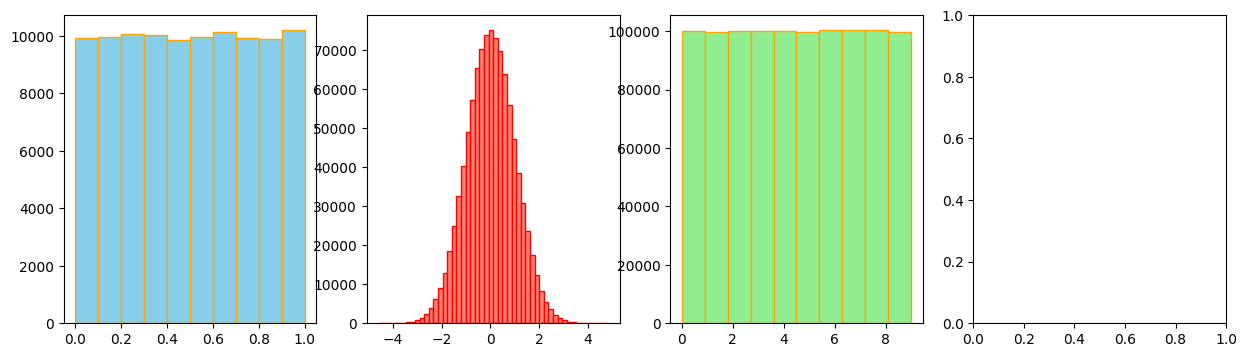

In [ ]:
# 2.torch.randn()
randn_tensor = torch.randn(1000000)
print(randn_tensor)
print(randn_tensor.shape)
print(randn_tensor.min())
print(randn_tensor.max())   

print(randn_tensor.mean(),randn_tensor.std()) # 소수점 연산의 오류는 있을 수 있다.

# randint : 0(포함)부터 10까지의 정수중 랜덤하게 10000개 선택
# 0은 포함하지만 마지막 10은 미포함
randint_tensor = torch.randint(low=0,high=10,size=(1000000,)) # 사이즈는 튜플로 주면 됨  
print(randint_tensor.shape) 
print(randint_tensor.unique()) # 중복된 값은 제외

# 2차원 randint: 2 X 3, 0~100사이 까지의 값으로
randint_matrix = torch.randint(0,100,(2,3))
print(randint_matrix)

# 시각화
fig,axes = plt.subplots(1,4,figsize=(15,4)) # 1행 3열의 subplot 생성 
axes[0].hist(rand_tensor,bins=10,color="skyblue",edgecolor="orange") # 균든분포 :갯수가 많아질수록 평평하다 , 갯수가 많을수록 분포를 따른다.
                                                                     # 균둥분포: 쪼개질 확률, 쪼개진만큼의 확률값이 나옴
axes[1].hist(randn_tensor,bins=50,color="salmon",edgecolor="red") # 정규분포: 
axes[2].hist(randint_tensor,bins=10,color="lightgreen",edgecolor="orange") 
# axes[3].hist(randint_tensor,bins=10,color="skyblue",edgecolor="orange") 
                                                                      # 데이터가 많을수록 균등분포를 따른다.



plt.show()  

In [ ]:
# 2장은 진짜 중요하다, 바짝 체크해야함, 코딩 다시하고 외워야함
# 22page 재현성 확보 코드

import torch

# 1. 시드(seed)를 42로 설정
torch.manual_seed(42) # manual은 수동으로 설정
# 시드값만 똑같으면 똑같은 결과가 나옴
rand1 = torch.rand(2, 2)
print(f"Random tensor with seed 42:\n{rand1}")


# 2. 시드 설정 없이 다시 생성 (이전 상태에 이어서 생성)
rand2 = torch.rand(2, 2)
print(f"\nNext random tensor:\n{rand2}")


# 3. 시드를 다시 42로 설정
torch.manual_seed(42)
rand3 = torch.rand(2, 2)
print(f"\nRandom tensor with seed 42 again:\n{rand3}")


Random tensor with seed 42:
tensor([[0.8823, 0.9150],
        [0.3829, 0.9593]])

Next random tensor:
tensor([[0.3904, 0.6009],
        [0.2566, 0.7936]])

Random tensor with seed 42 again:
tensor([[0.8823, 0.9150],
        [0.3829, 0.9593]])


In [122]:
# 시퀀스값 텐서 생성
# torch.arange(),torch.linspace(),torch.logspace() 
# 시퀀스라는 단어 들어가면 --> 순서다.

# 1.torch.arange() : 주어진 간격(step)으로 균일하게 증가하는 시퀀스값 생성
# arange(start,end,step)
arange_tensor = torch.arange(0,10,2) # start: 시작값, end: 종료값, step: 간격
print(arange_tensor)

# 2.torch.linspace() : 주어진 구간을 원하는 갯수(step)로 균일하게 분할(끝점 포함)
# linspace(start,end,steps)
# linspace_tensor(start,end,steps) --> [start,...,end]텐서
linspace_tensor = torch.linspace(0,10,steps=5)  #step은 구간의 갯수, arange 랑 다름
# start: 시작값, end: 종료값, steps: 간격

print(linspace_tensor) 

# 3.torch.logspace()


tensor([0, 2, 4, 6, 8])
tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])


In [ ]:
# 원래 텐서 생성되야함 : 크기(2,3),float64,cuda
original_tensor = torch.randn(2,3,dtype=torch.float64,device='cuda')
# 0부터 1까지 랜덤값나옴, 근데 0은 안나옴
print(original_tensor)
print(original_tensor.dtype)
print(original_tensor.device)

# zeros_like
zeros_like_tensor = torch.zeros_like(original_tensor)
print(zeros_like_tensor)
print(zeros_like_tensor.shape)
print(zeros_like_tensor.dtype)
print(zeros_like_tensor.device)

# ones_like
ones_like_tensor = torch.ones_like(original_tensor)
print(ones_like_tensor)
print(ones_like_tensor.shape)
print(ones_like_tensor.dtype)
print(ones_like_tensor.device)

# rand_like
rand_like_tensor = torch.rand_like(original_tensor)
print(rand_like_tensor)
print(rand_like_tensor.shape)
print(rand_like_tensor.dtype)
print(rand_like_tensor.device)

# AI 도움은 나중에 받는걸로...



tensor([[-0.7254,  0.3085, -0.0793],
        [ 0.3490, -0.8810, -0.1884]], device='cuda:0', dtype=torch.float64)
torch.float64
cuda:0
tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0', dtype=torch.float64)
torch.Size([2, 3])
torch.float64
cuda:0
tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0', dtype=torch.float64)
torch.Size([2, 3])
torch.float64
cuda:0
tensor([[0.4369, 0.1778, 0.3861],
        [0.6229, 0.7917, 0.9636]], device='cuda:0', dtype=torch.float64)
torch.Size([2, 3])
torch.float64
cuda:0
